In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('50_startups.csv')

In [2]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Fid the null values and handle it
label encoding
OHE
Scaling
Data visualization
cont - corr() [relation]
feature selection

In [3]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


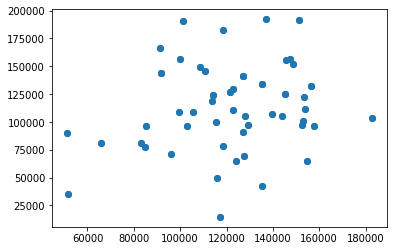

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Administration'],data['Profit'])

In [5]:
x=data.iloc[:,0:4]

In [6]:
y=data.iloc[:,4:]

In [ ]:
#x.drop('Administration',
 # axis='columns', inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.State=le.fit_transform(x['State'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(22, 4)
(86, 4)
(86, 1)
(22, 1)


In [ ]:
y_test[:5]

In [ ]:
linear regression - linear_model LinearRegression
logistic regression - linear_model LogisticRegression
decision tree-  tree -DecisionTreeRegressor, DecisionTreeClassifier
random forest - ensemble - RandomForestRegressor , RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rfc=RandomForestRegressor()

In [13]:
rfc.fit(x_train,y_train)

<ipython-input-13-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
metrics to used

contious - r2_score
categorical - confusion matrix

1. accuracy ( balanced)
2. precision (FP)
3. recall (FN)
4. f1 score( precision + recall)

In [14]:
from sklearn.metrics import r2_score

In [15]:
yu=rfc.predict(x_test)

In [16]:
r2_score(yu,y_test)

0.9473905607912632

In [17]:
y_pred_train=rfc.predict(x_train)
r2_score(y_train,y_pred_train)

0.9964855249488684

In [ ]:
mse,mae